In [1]:
# Install required libraries (run once in Colab)
!pip -q install arabic-reshaper python-bidi seaborn matplotlib pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 4.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import arabic_reshaper
from bidi.algorithm import get_display

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

def fix_arabic_text(text: str) -> str:
    """Fix Arabic shaping + direction for Matplotlib titles/labels."""
    try:
        reshaped = arabic_reshaper.reshape(text)
        return get_display(reshaped)
    except Exception:
        return text

# Backward-compatible alias used in some snippets
text_arabic_fix = fix_arabic_text


In [3]:
# Colab-friendly CSV loader (either from path or via upload)
from pathlib import Path

def load_csv(filename: str) -> pd.DataFrame:
    """Load CSV from current directory; if missing, prompt for upload in Colab."""
    p = Path(filename)
    if p.exists():
        return pd.read_csv(p)
    try:
        from google.colab import files  # type: ignore
        print(f"'{filename}' not found. Please upload it now...")
        uploaded = files.upload()
        if filename not in uploaded:
            # If user uploaded with a different name, pick the first uploaded file
            filename = next(iter(uploaded.keys()))
            print(f"Using uploaded file: {filename}")
        return pd.read_csv(filename)
    except Exception as e:
        raise FileNotFoundError(f"Could not find '{filename}' and upload is unavailable in this environment.") from e


## 1) Human_Resources.csv — Core Seaborn examples (distribution, comparisons, relationships)

In [4]:
hr_data = load_csv("Human_Resources.csv")

print("عدد الموظفين:", len(hr_data))
print("عدد الأعمدة:", len(hr_data.columns))
hr_data.head()


عدد الموظفين: 1470
عدد الأعمدة: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,...,4,80,1,6,3,3,2,2,2,2


### 1.1 Clustered bar chart — Education by Gender

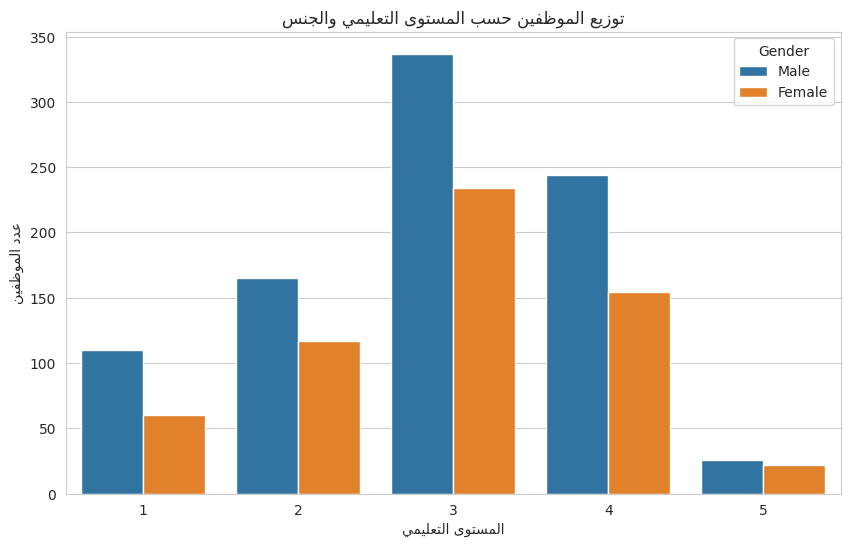

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='Education', hue='Gender')
plt.title(text_arabic_fix('توزيع الموظفين حسب المستوى التعليمي والجنس'))
plt.xlabel(fix_arabic_text('المستوى التعليمي'))
plt.ylabel(fix_arabic_text('عدد الموظفين'))
plt.show()


### 1.2 Age and Monthly Income distributions (histogram + KDE)

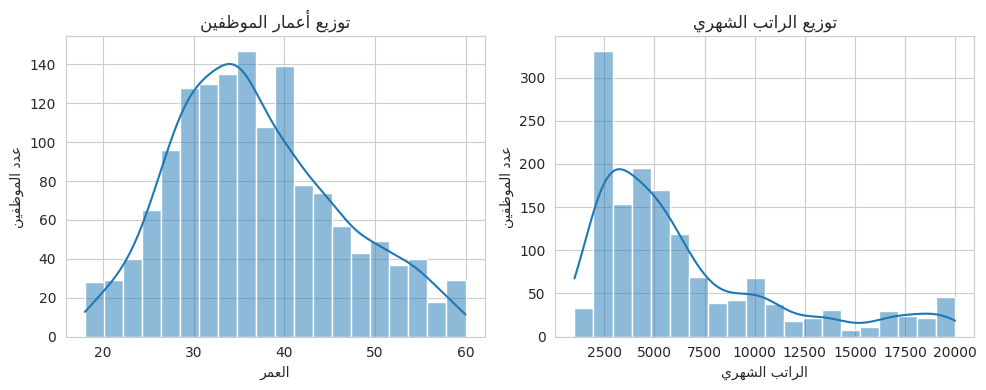

In [6]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=hr_data, x='Age', bins=20, kde=True)
plt.title(fix_arabic_text('توزيع أعمار الموظفين'))
plt.xlabel(fix_arabic_text('العمر'))
plt.ylabel(fix_arabic_text('عدد الموظفين'))

plt.subplot(1, 2, 2)
sns.histplot(data=hr_data, x='MonthlyIncome', bins=20, kde=True)
plt.title(fix_arabic_text('توزيع الراتب الشهري'))
plt.xlabel(fix_arabic_text('الراتب الشهري'))
plt.ylabel(fix_arabic_text('عدد الموظفين'))

plt.tight_layout()
plt.show()


### 1.3 FacetGrid — Monthly Income distribution by Department and Gender

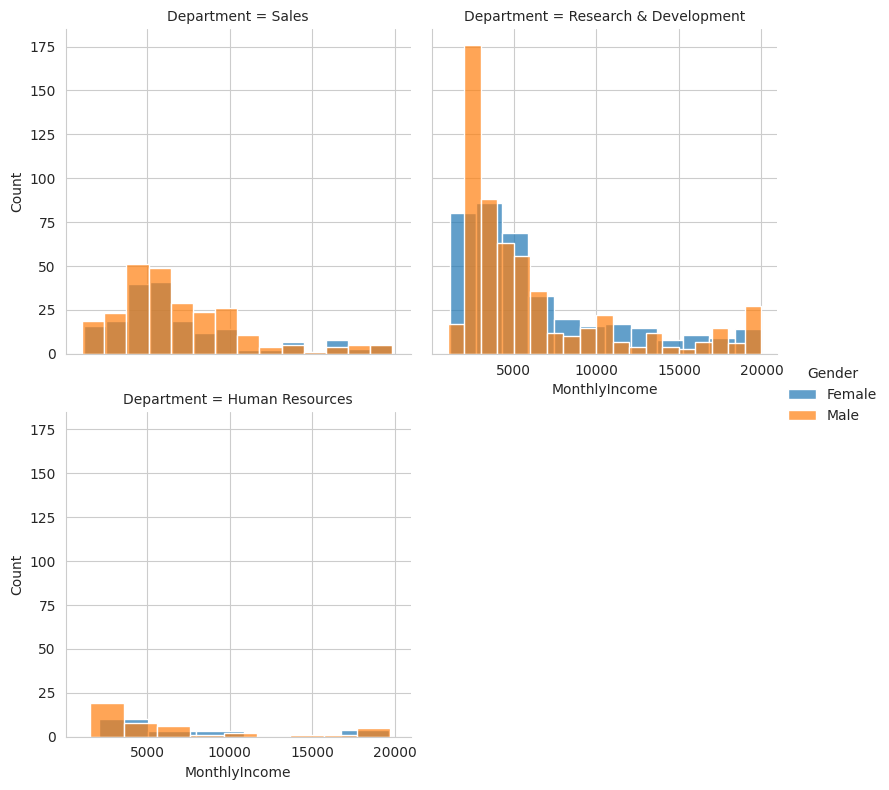

In [7]:
g = sns.FacetGrid(hr_data, col='Department', hue='Gender', col_wrap=2, height=4)
g.map(sns.histplot, 'MonthlyIncome', alpha=0.7)
g.add_legend()
plt.show()


### 1.4 Boxplots — Monthly Income by Department and JobRole (subplots)

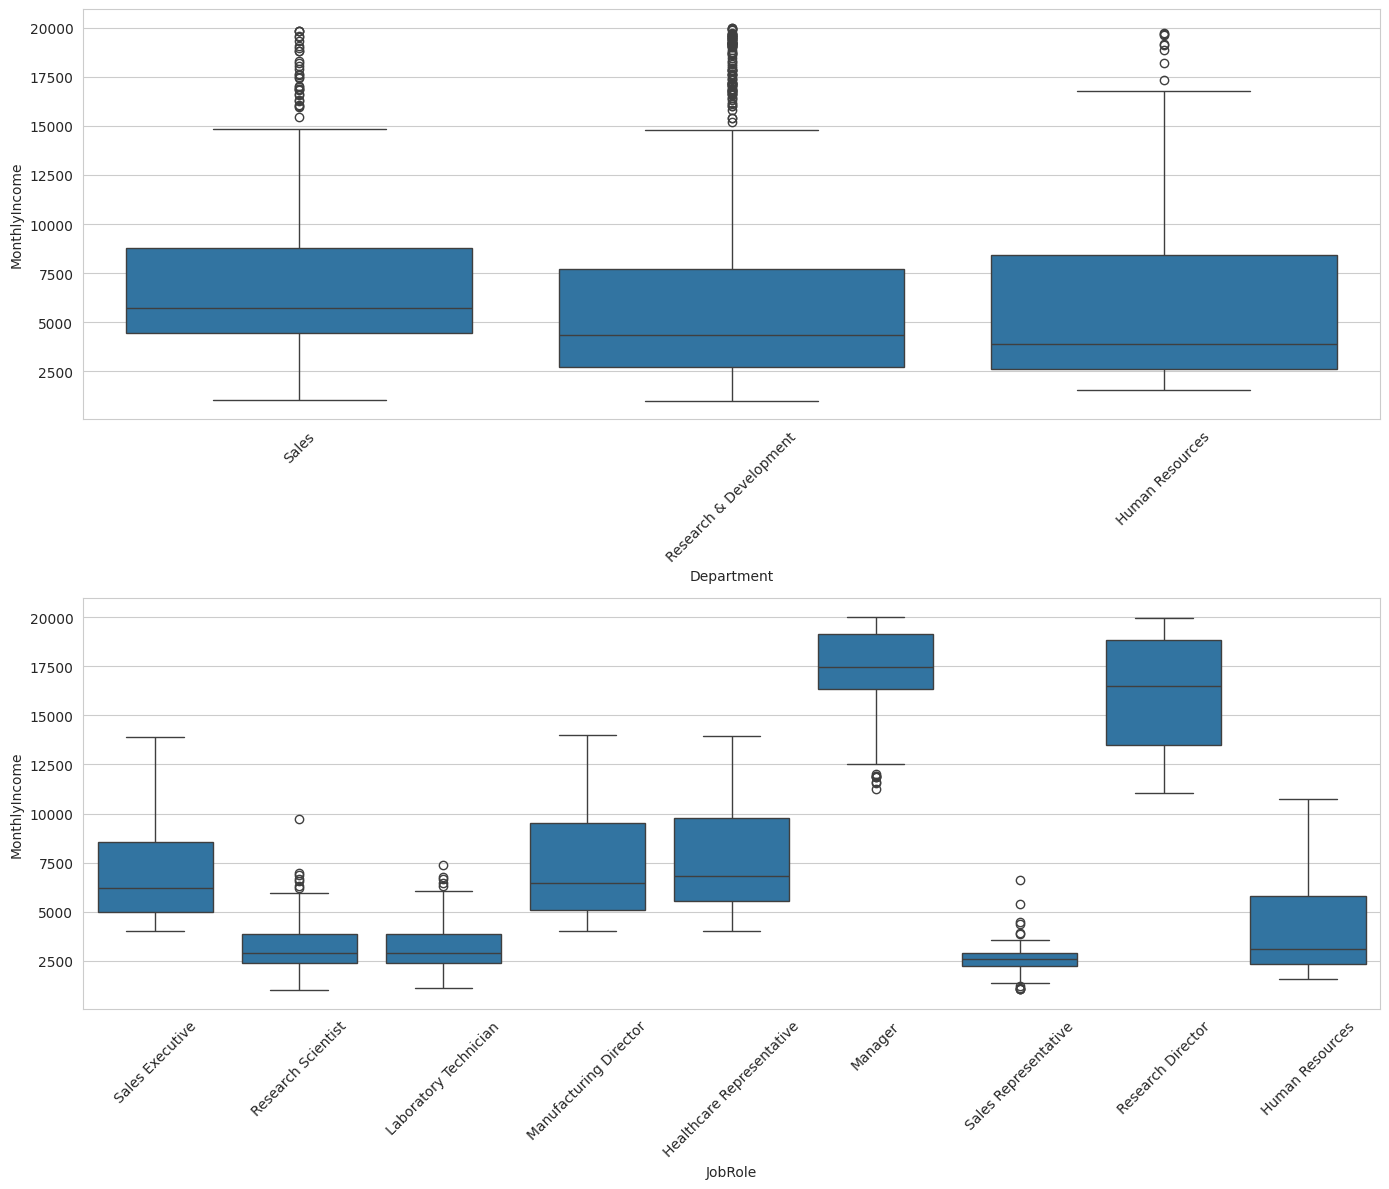

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))  # 2 rows, 1 column

sns.boxplot(data=hr_data, x='Department', y='MonthlyIncome', ax=axes[0])
sns.boxplot(data=hr_data, x='JobRole', y='MonthlyIncome', ax=axes[1])

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 1.5 Line plot — Monthly Income by Age

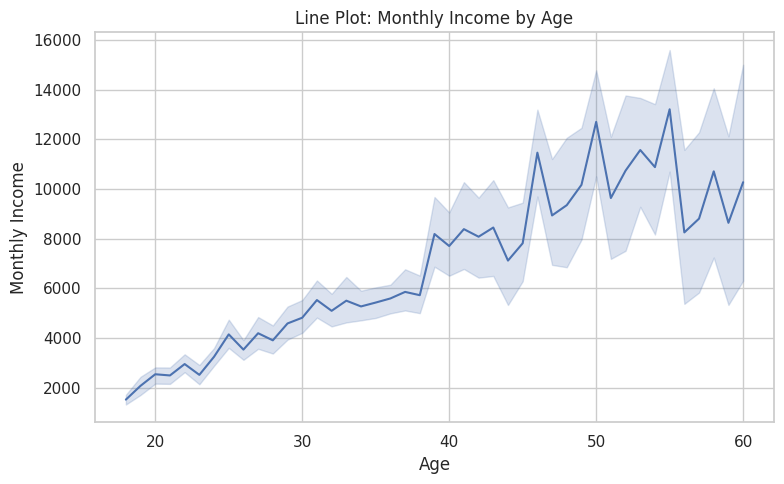

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=hr_data, x='Age', y='MonthlyIncome')
plt.title('Line Plot: Monthly Income by Age')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()


### 1.6 Scatter plot — Age vs Monthly Income (hue = Gender)

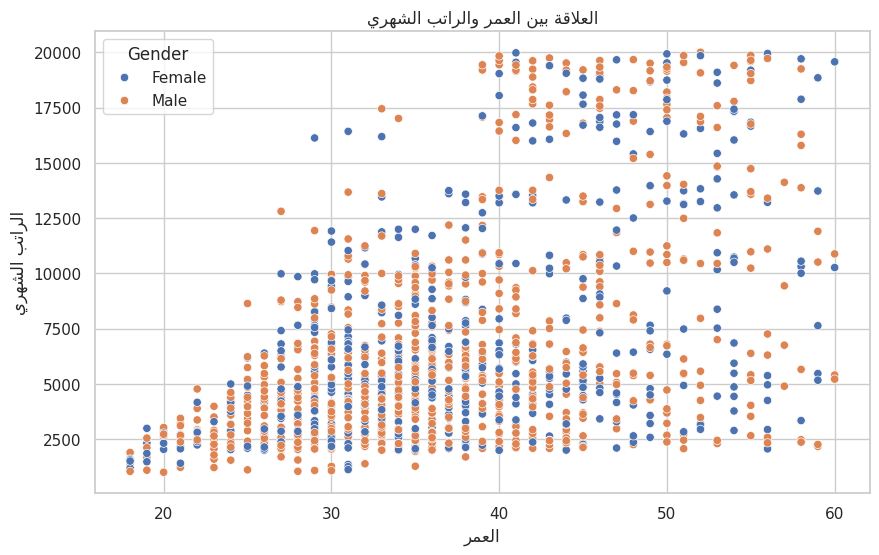

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hr_data, x='Age', y='MonthlyIncome', hue='Gender')
plt.title(text_arabic_fix('العلاقة بين العمر والراتب الشهري'))
plt.xlabel(fix_arabic_text('العمر'))
plt.ylabel(fix_arabic_text('الراتب الشهري'))
plt.show()


### 1.7 Violin plot — Job Satisfaction by Gender

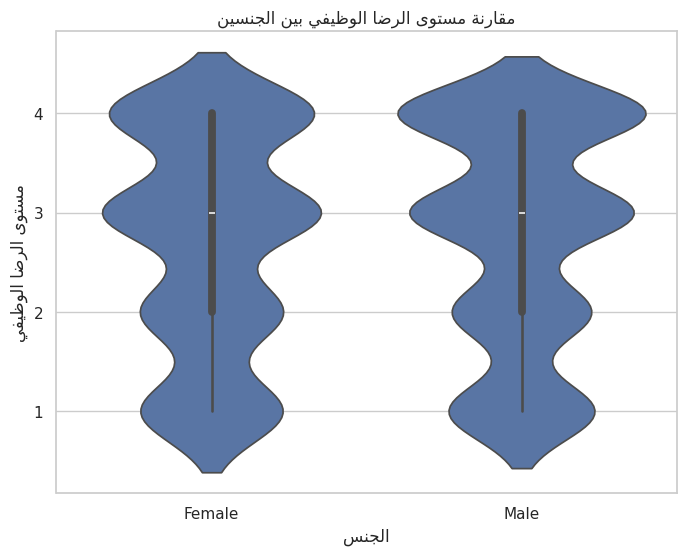

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=hr_data, x='Gender', y='JobSatisfaction')
plt.title(text_arabic_fix('مقارنة مستوى الرضا الوظيفي بين الجنسين'))
plt.xlabel(fix_arabic_text('الجنس'))
plt.ylabel(fix_arabic_text('مستوى الرضا الوظيفي'))
plt.show()


### 1.8 Heatmap — Correlation matrix for selected numeric variables

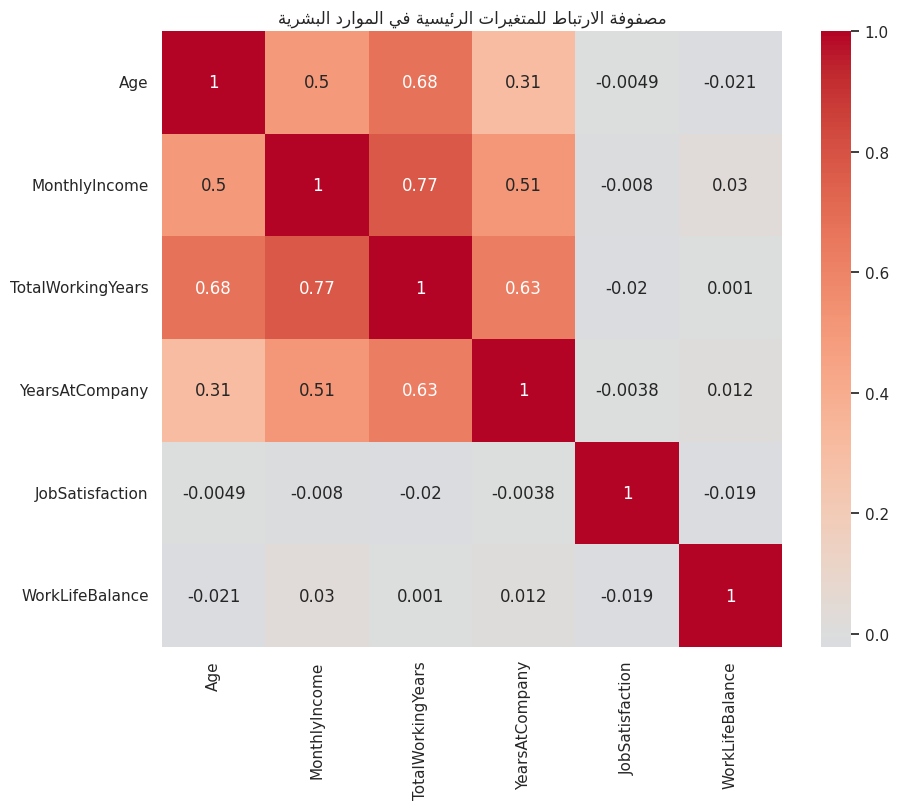

In [12]:
numeric_columns = [
    'Age', 'MonthlyIncome', 'TotalWorkingYears',
    'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance'
]

correlation_matrix = hr_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(text_arabic_fix('مصفوفة الارتباط للمتغيرات الرئيسية في الموارد البشرية'))
plt.show()


## 2) Workforce Demographics.csv — Demographic indicators

In [13]:
data = load_csv("Workforce Demographics.csv")
data.head()


,Age,Gender,ServiceYears,Education,Nationality
0,50,Male,1,Diploma,Local
1,36,Male,5,High School,Expat
2,29,Female,17,Bachelor,Expat
3,42,Male,1,Bachelor,Expat
4,40,Female,17,Master,Local


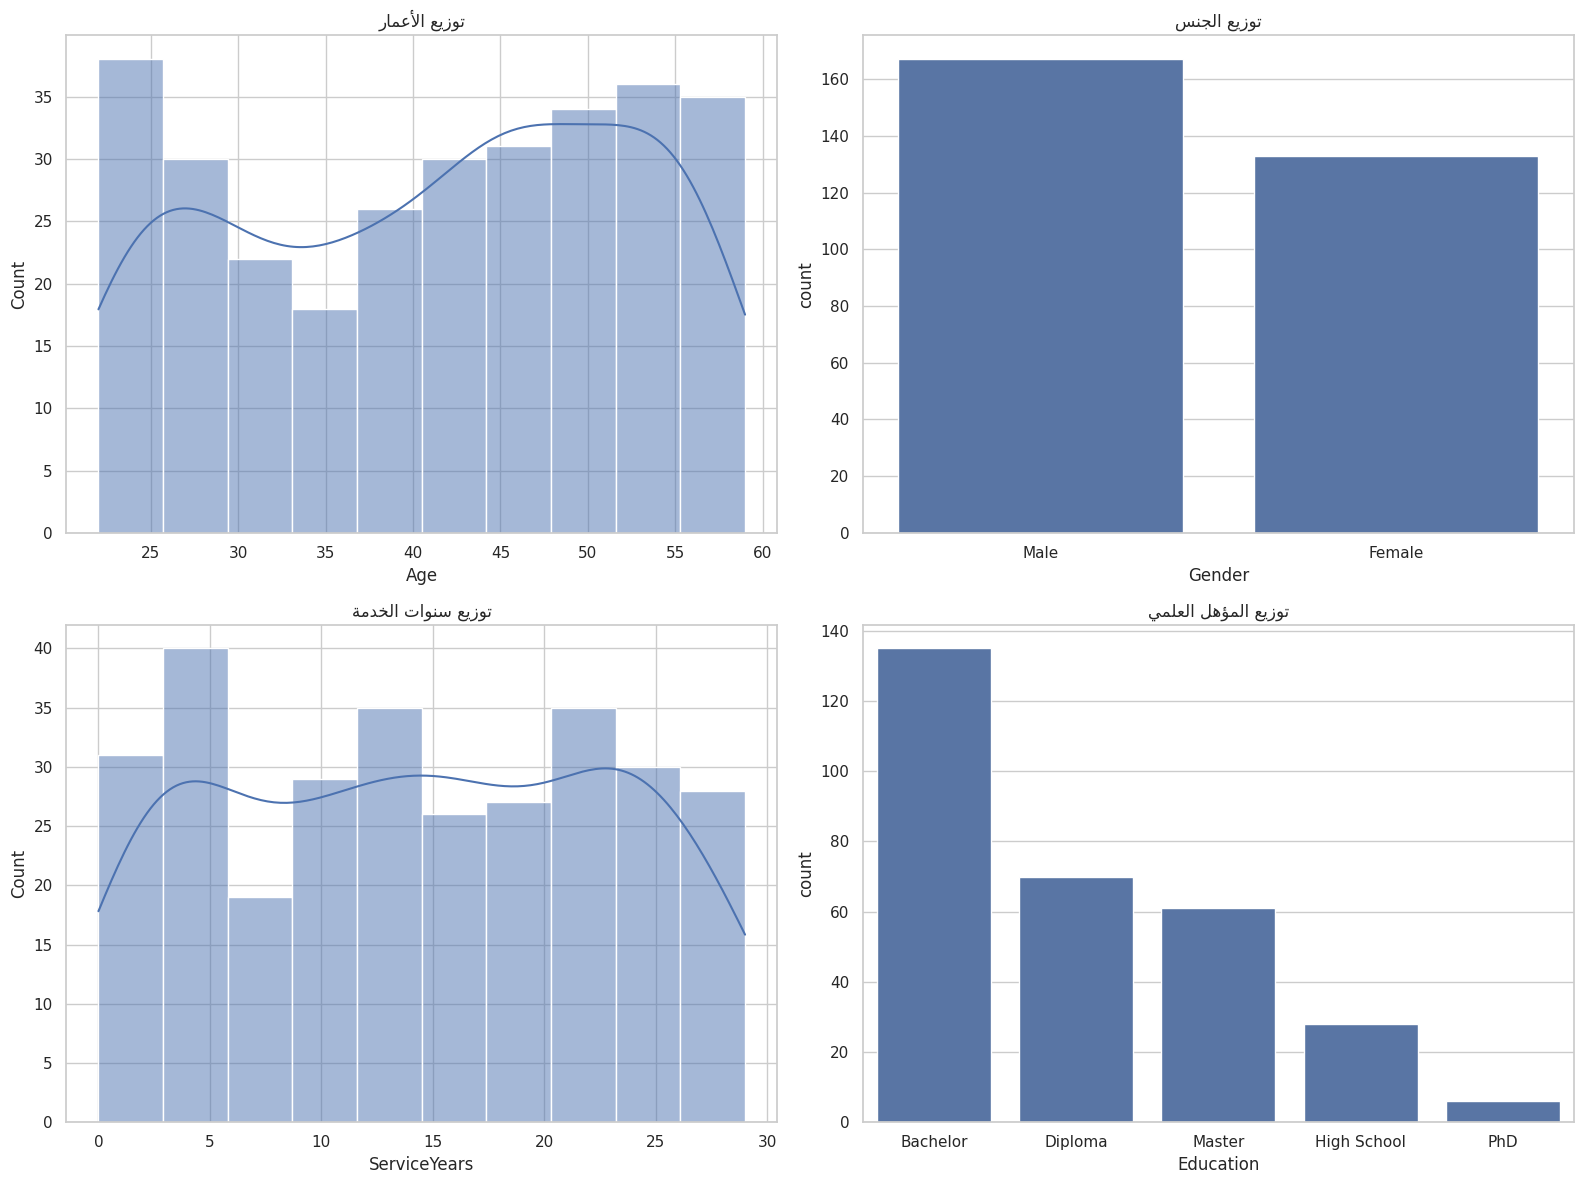

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=10, kde=True)
plt.title(fix_arabic_text('توزيع الأعمار'))

# Gender distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=data)
plt.title(fix_arabic_text('توزيع الجنس'))

# Years of service
plt.subplot(2, 2, 3)
sns.histplot(data['ServiceYears'], bins=10, kde=True)
plt.title(fix_arabic_text('توزيع سنوات الخدمة'))

# Education
plt.subplot(2, 2, 4)
sns.countplot(x='Education', data=data, order=data['Education'].value_counts().index)
plt.title(fix_arabic_text('توزيع المؤهل العلمي'))

plt.tight_layout()
plt.show()


## 3) Talent Acquisition Metrics.csv — Recruitment and selection indicators

In [15]:
df = load_csv("Talent Acquisition Metrics.csv")
df.head()


,TimeToFill,CostPerHire,Source,HireQuality,OfferAccepted
0,43,3252,Job Portal,5,Yes
1,56,4038,Agency,5,Yes
2,33,3294,Job Portal,4,Yes
3,19,3205,Agency,2,Yes
4,47,4518,Job Portal,1,No


/tmp/ipython-input-3462614718.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Source', data=df, palette='Set2')
/tmp/ipython-input-3462614718.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HireQuality', data=df, palette='Blues')


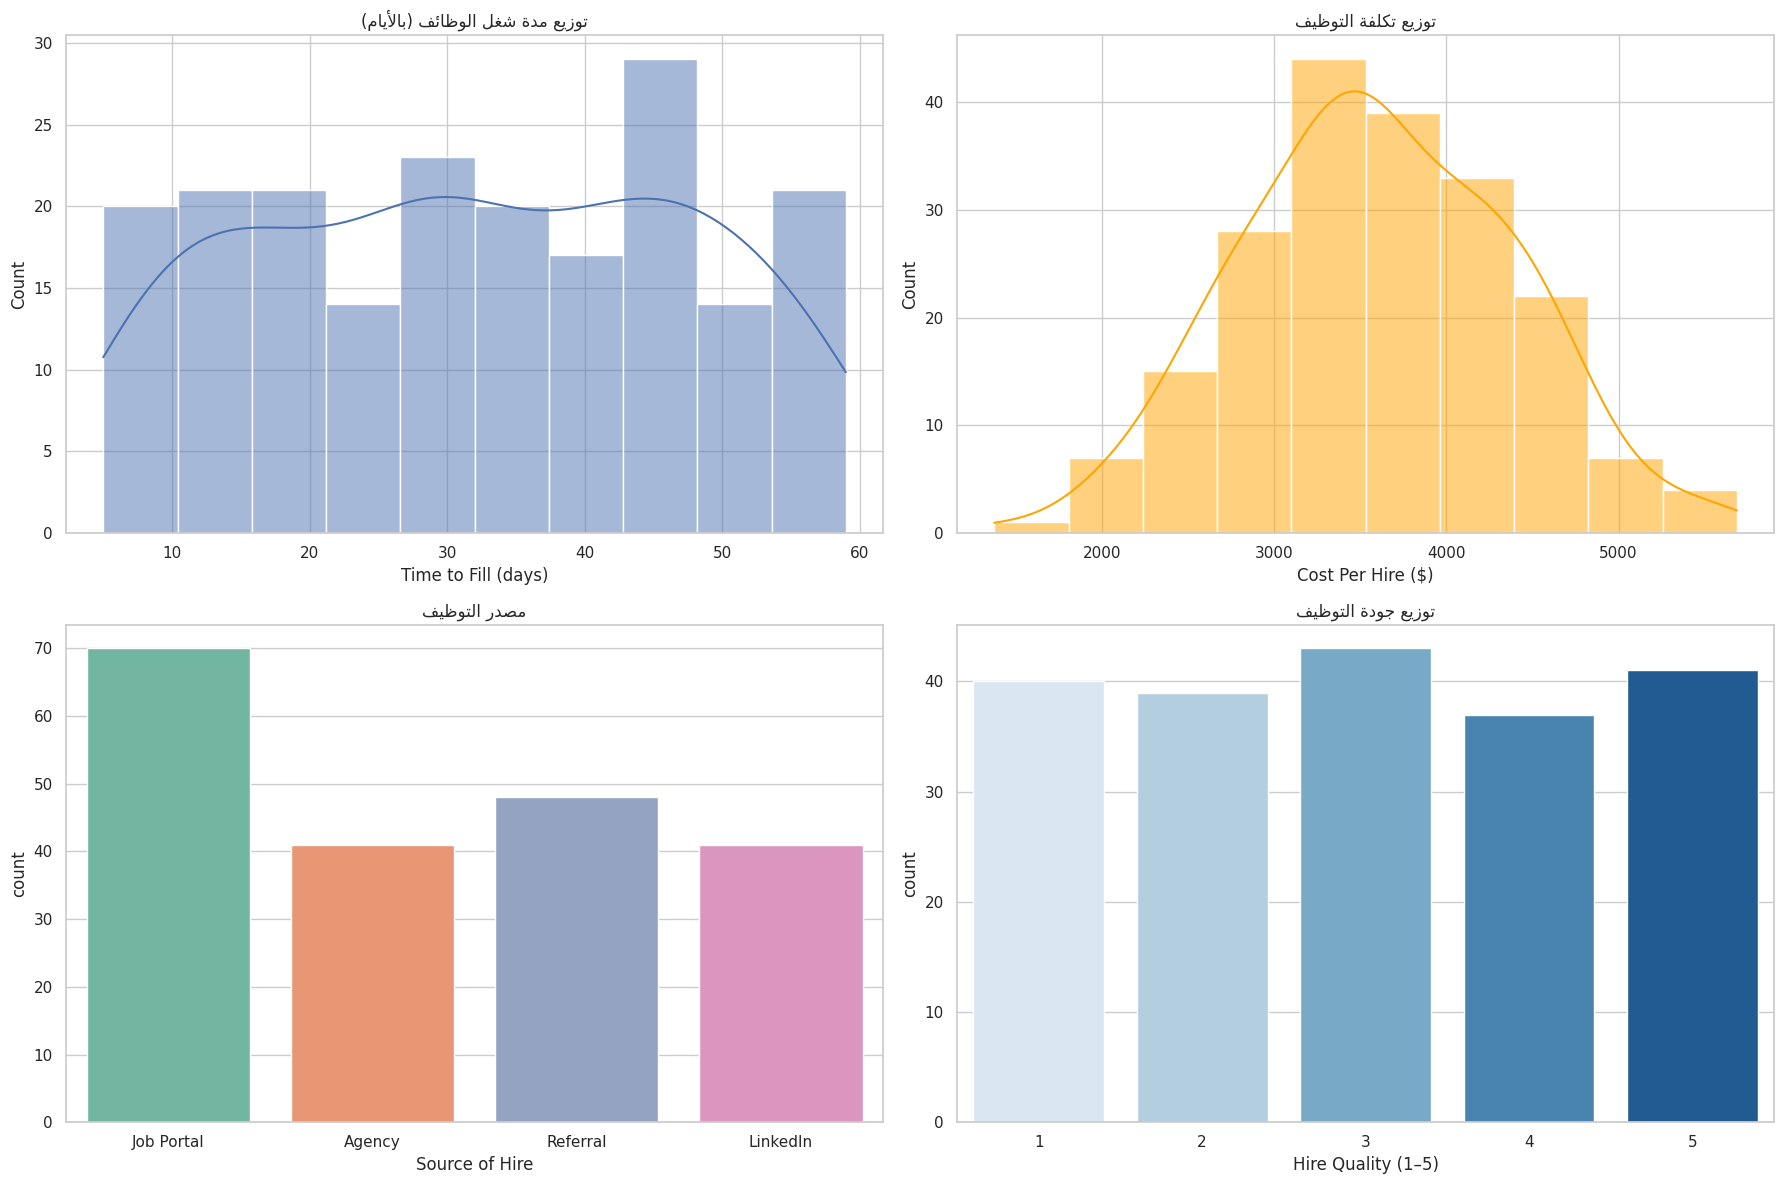

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Time to fill
plt.subplot(2, 2, 1)
sns.histplot(df['TimeToFill'], bins=10, kde=True)
plt.title(text_arabic_fix('توزيع مدة شغل الوظائف (بالأيام)'))
plt.xlabel('Time to Fill (days)')

# Cost per hire
plt.subplot(2, 2, 2)
sns.histplot(df['CostPerHire'], bins=10, kde=True, color='orange')
plt.title(fix_arabic_text('توزيع تكلفة التوظيف'))
plt.xlabel('Cost Per Hire ($)')

# Source
plt.subplot(2, 2, 3)
sns.countplot(x='Source', data=df, palette='Set2')
plt.title(fix_arabic_text('مصدر التوظيف'))
plt.xlabel('Source of Hire')

# Hire quality
plt.subplot(2, 2, 4)
sns.countplot(x='HireQuality', data=df, palette='Blues')
plt.title(fix_arabic_text('توزيع جودة التوظيف'))
plt.xlabel('Hire Quality (1–5)')

plt.tight_layout()
plt.show()


### 3.1 Offer acceptance rate (pie chart)

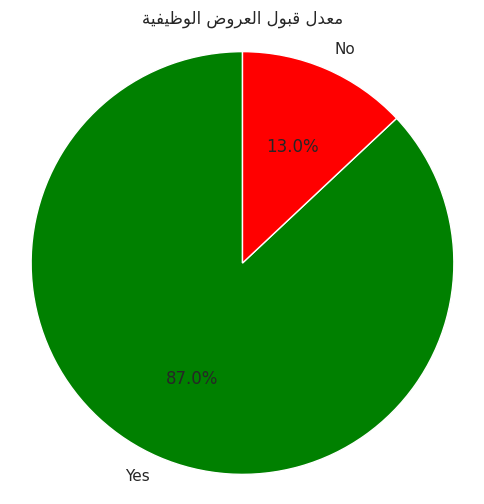

In [17]:
acceptance_rate = df['OfferAccepted'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(
    acceptance_rate,
    labels=['Yes', 'No'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['green', 'red']
)
plt.title(fix_arabic_text('معدل قبول العروض الوظيفية'))
plt.axis('equal')
plt.show()


## 4) benefits_metrics.csv — Compensation and benefits indicators

In [18]:
df = load_csv("benefits_metrics.csv")
df.head()


'benefits_metrics.csv' not found. Please upload it now...


Saving benefits_metrics.csv to benefits_metrics.csv


,CompaRatio,TotalBenefitsCost,BenefitsParticipation,OvertimeHours,PayEquityRatio
0,1.099343,8342,Yes,5,0.874761
1,0.972347,8879,Yes,7,1.036363
2,1.129538,11494,Yes,6,1.088689
3,1.304606,11220,Yes,3,0.957924
4,0.953169,9958,Yes,8,0.800000


/tmp/ipython-input-458059060.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BenefitsParticipation', data=df, palette='Set2')


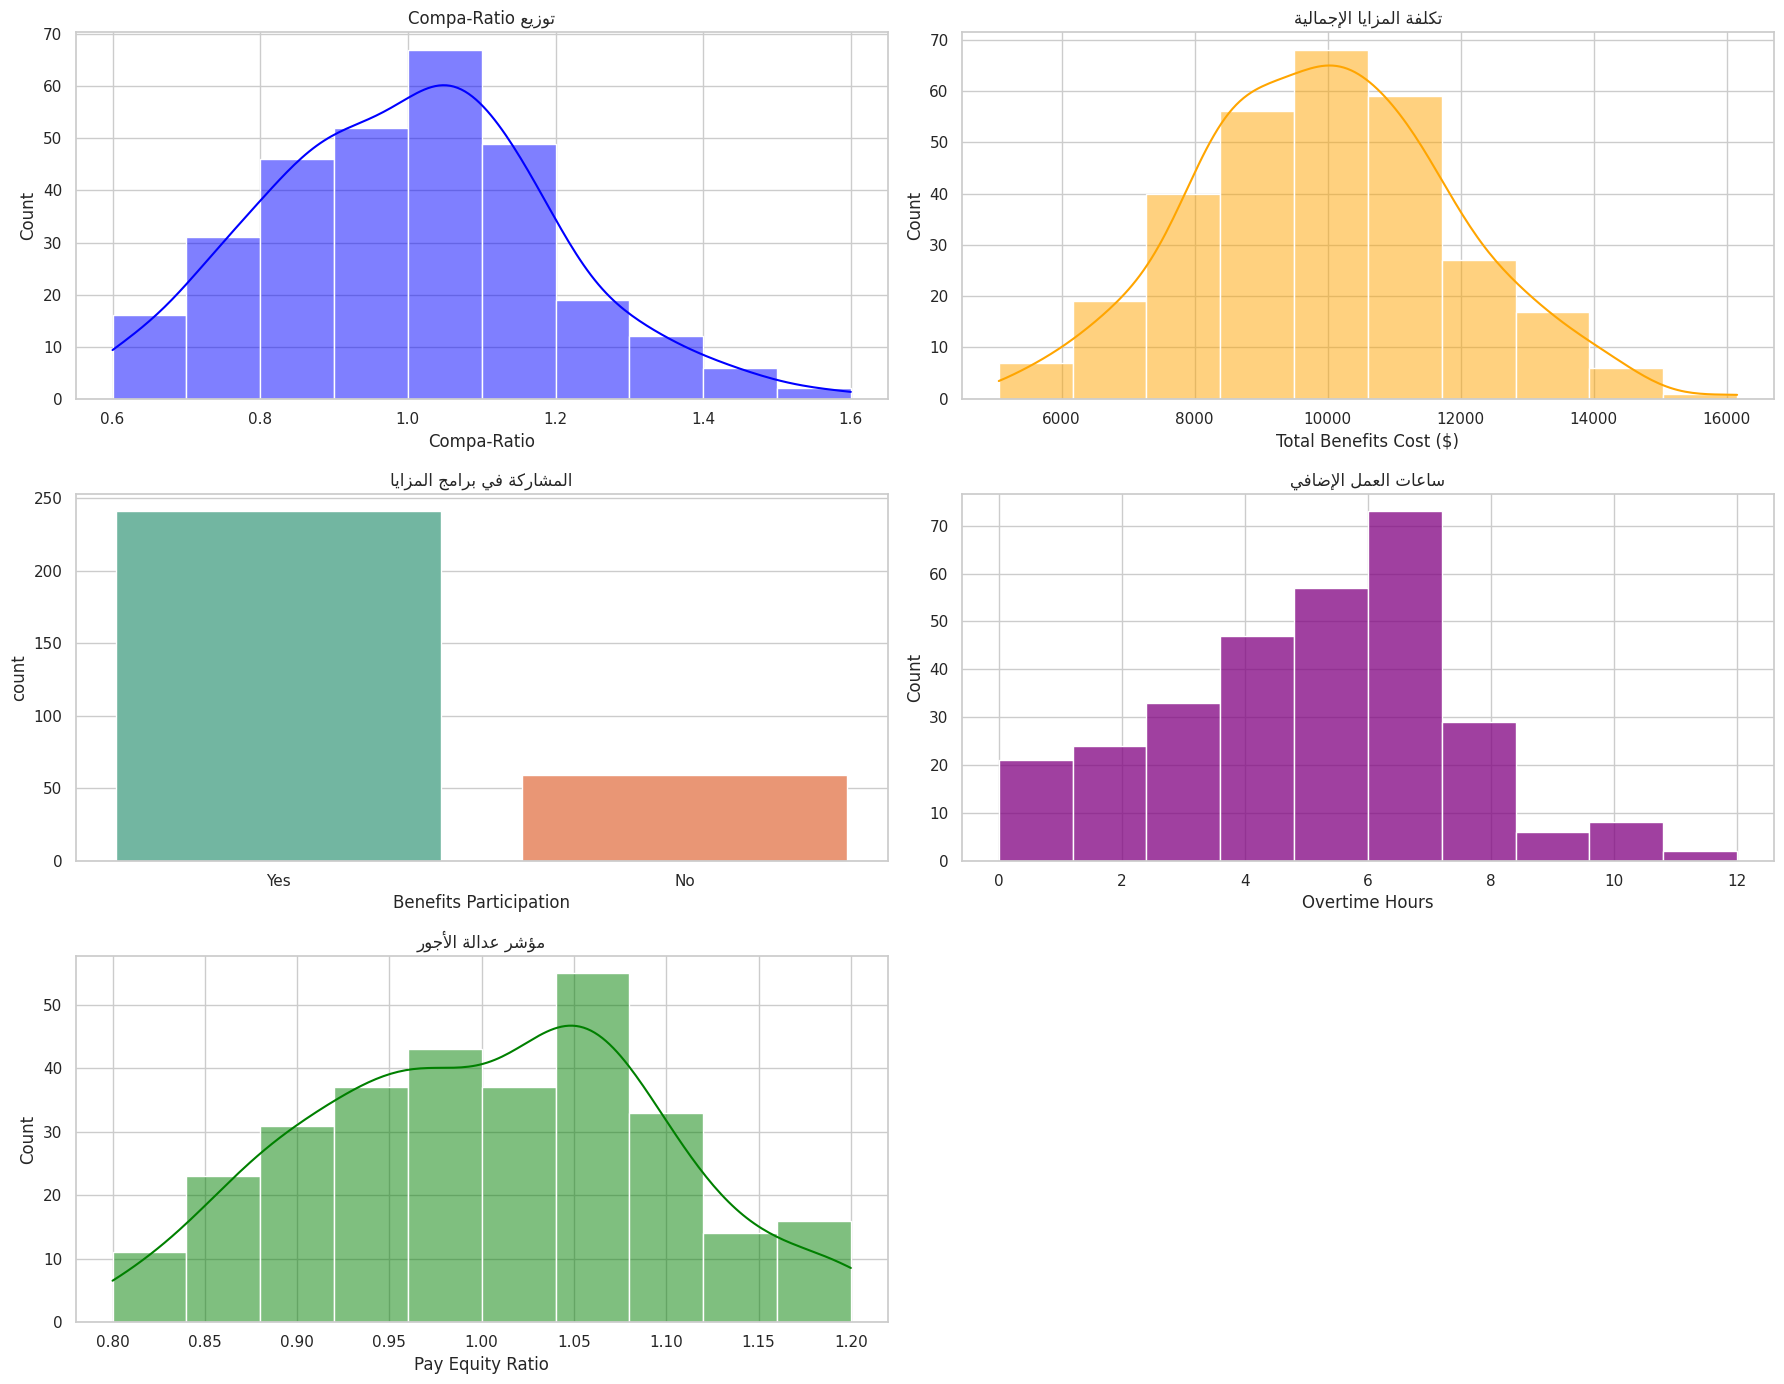

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 14))

# Compa-Ratio
plt.subplot(3, 2, 1)
sns.histplot(df['CompaRatio'], bins=10, kde=True, color='blue')
plt.title(fix_arabic_text('توزيع Compa-Ratio'))
plt.xlabel('Compa-Ratio')

# Total Benefits Cost
plt.subplot(3, 2, 2)
sns.histplot(df['TotalBenefitsCost'], bins=10, kde=True, color='orange')
plt.title(fix_arabic_text('تكلفة المزايا الإجمالية'))
plt.xlabel('Total Benefits Cost ($)')

# Benefits Participation
plt.subplot(3, 2, 3)
sns.countplot(x='BenefitsParticipation', data=df, palette='Set2')
plt.title(fix_arabic_text('المشاركة في برامج المزايا'))
plt.xlabel('Benefits Participation')

# Overtime Hours
plt.subplot(3, 2, 4)
sns.histplot(df['OvertimeHours'], bins=10, kde=False, color='purple')
plt.title(fix_arabic_text('ساعات العمل الإضافي'))
plt.xlabel('Overtime Hours')

# Pay Equity Ratio
plt.subplot(3, 2, 5)
sns.histplot(df['PayEquityRatio'], bins=10, kde=True, color='green')
plt.title(fix_arabic_text('مؤشر عدالة الأجور'))
plt.xlabel('Pay Equity Ratio')

plt.tight_layout()
plt.show()


## 5) Performance_metrics.csv — Performance and productivity indicators

In [20]:
df = load_csv("Performance_metrics.csv")
df.head()


,PerformanceRating,GoalAchievementRate,RevenuePerEmployee,AbsenteeismDays,PresenteeismScore
0,4,83.723952,98218,5,70.465344
1,5,88.415908,114331,3,79.352832
2,3,100.000000,100722,4,66.736889
3,5,100.000000,134404,8,47.664995
4,5,75.504810,149739,8,57.663526


/tmp/ipython-input-671228154.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PerformanceRating', data=df, palette='Blues')


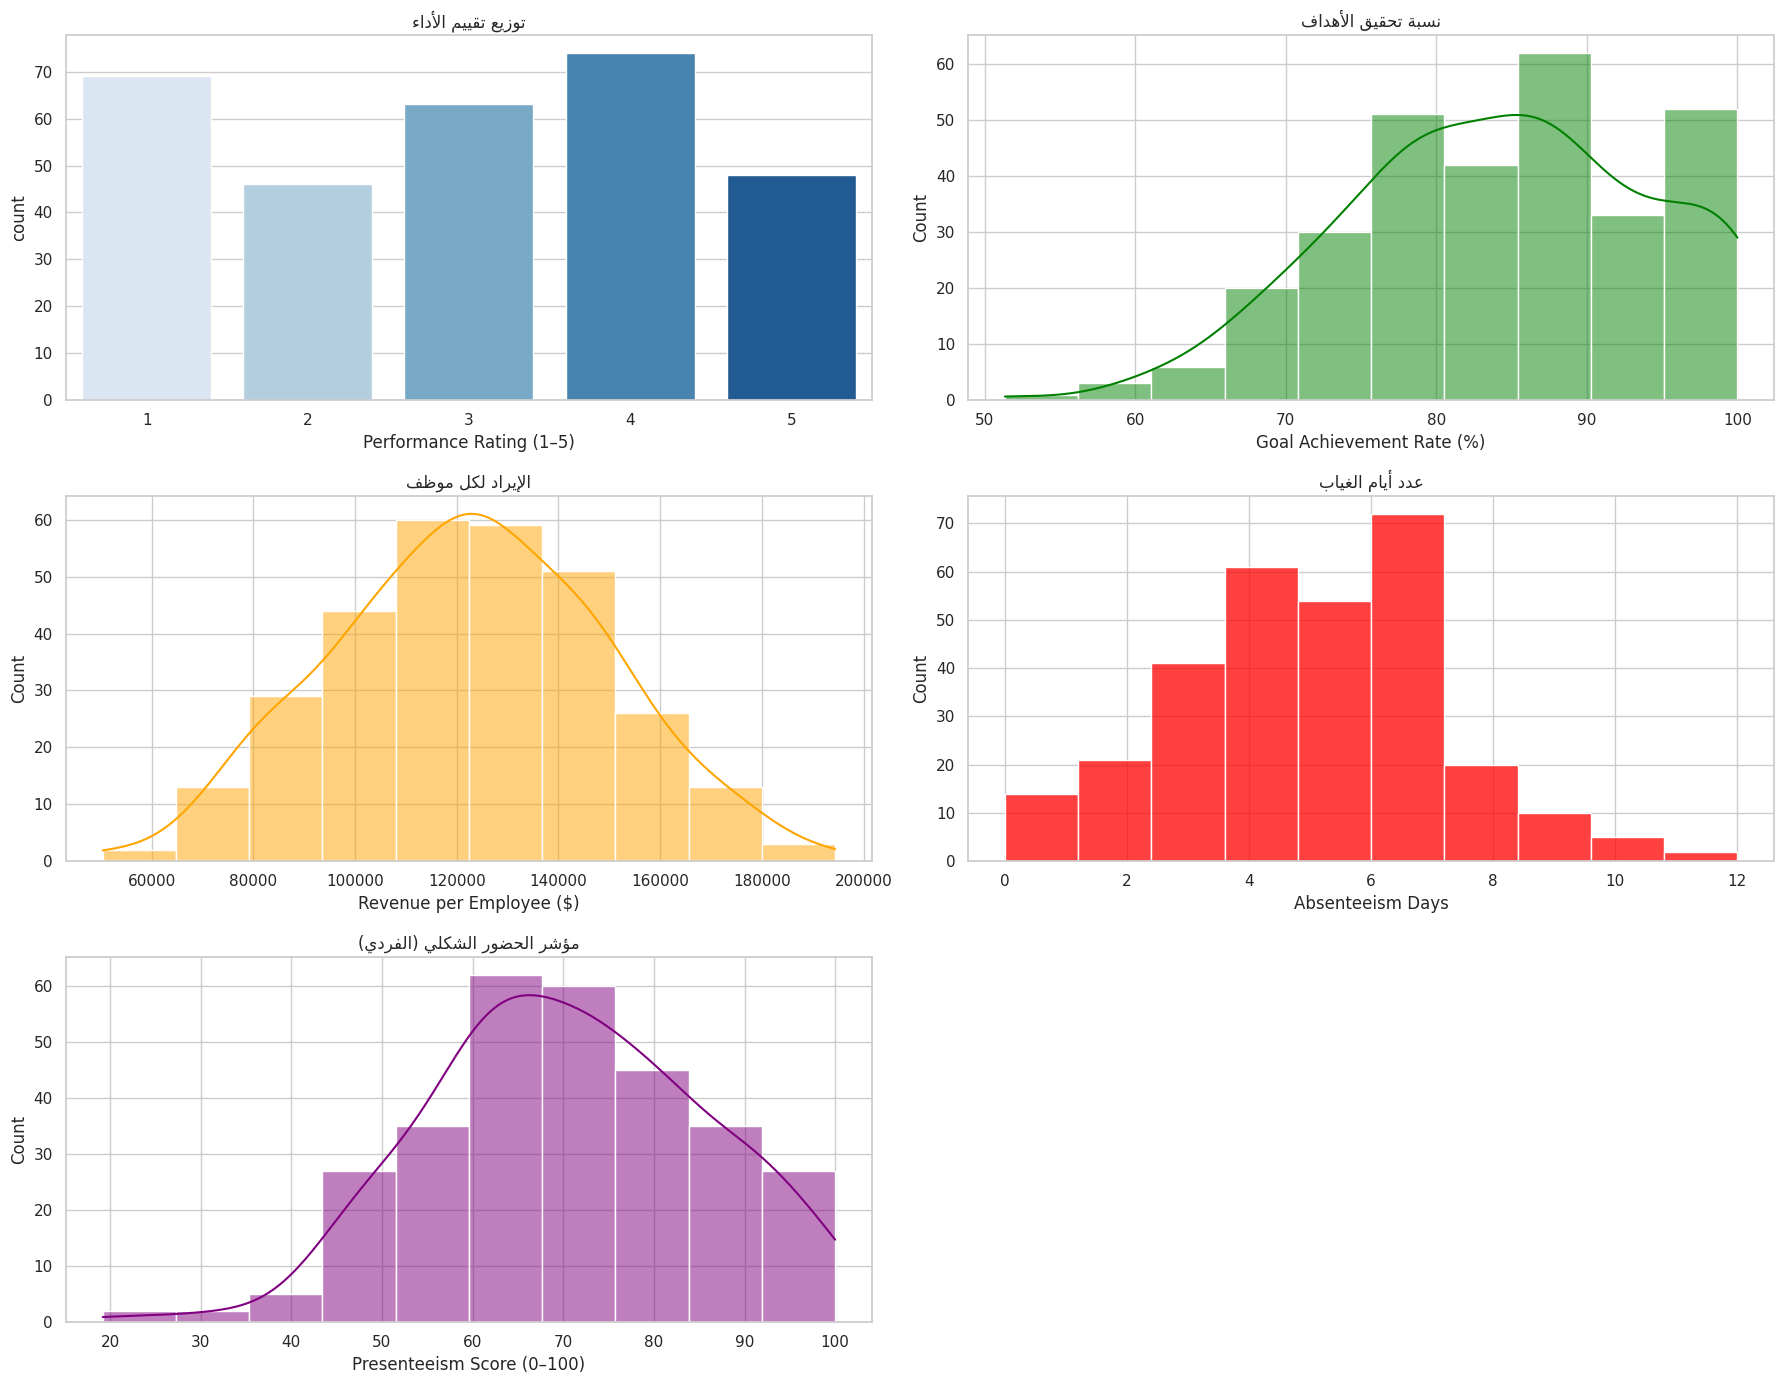

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 14))

# Performance Rating
plt.subplot(3, 2, 1)
sns.countplot(x='PerformanceRating', data=df, palette='Blues')
plt.title(fix_arabic_text('توزيع تقييم الأداء'))
plt.xlabel('Performance Rating (1–5)')

# Goal Achievement Rate
plt.subplot(3, 2, 2)
sns.histplot(df['GoalAchievementRate'], bins=10, kde=True, color='green')
plt.title(fix_arabic_text('نسبة تحقيق الأهداف'))
plt.xlabel('Goal Achievement Rate (%)')

# Revenue per Employee
plt.subplot(3, 2, 3)
sns.histplot(df['RevenuePerEmployee'], bins=10, kde=True, color='orange')
plt.title(fix_arabic_text('الإيراد لكل موظف'))
plt.xlabel('Revenue per Employee ($)')

# Absenteeism Days
plt.subplot(3, 2, 4)
sns.histplot(df['AbsenteeismDays'], bins=10, kde=False, color='red')
plt.title(fix_arabic_text('عدد أيام الغياب'))
plt.xlabel('Absenteeism Days')

# Presenteeism Score
plt.subplot(3, 2, 5)
sns.histplot(df['PresenteeismScore'], bins=10, kde=True, color='purple')
plt.title(fix_arabic_text('مؤشر الحضور الشكلي (الفردي)'))
plt.xlabel('Presenteeism Score (0–100)')

plt.tight_layout()
plt.show()


## 6) Training and Development.csv — Learning and development indicators

In [22]:
df = load_csv("Training and Development.csv")
df.head()


,TrainingHours,TrainingCompletion,InternalMobility,TrainingROI,SkillGapScore
0,22.483571,Completed,No,1.186516,2.532299
1,19.308678,Completed,No,2.406224,3.346504
2,23.238443,Completed,No,1.853876,2.953079
3,27.615149,Completed,Yes,1.218767,3.477041
4,18.829233,Not Completed,No,1.816204,3.076822


/tmp/ipython-input-1589256484.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TrainingCompletion', data=df, palette='Set2')
/tmp/ipython-input-1589256484.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='InternalMobility', data=df, palette='pastel')


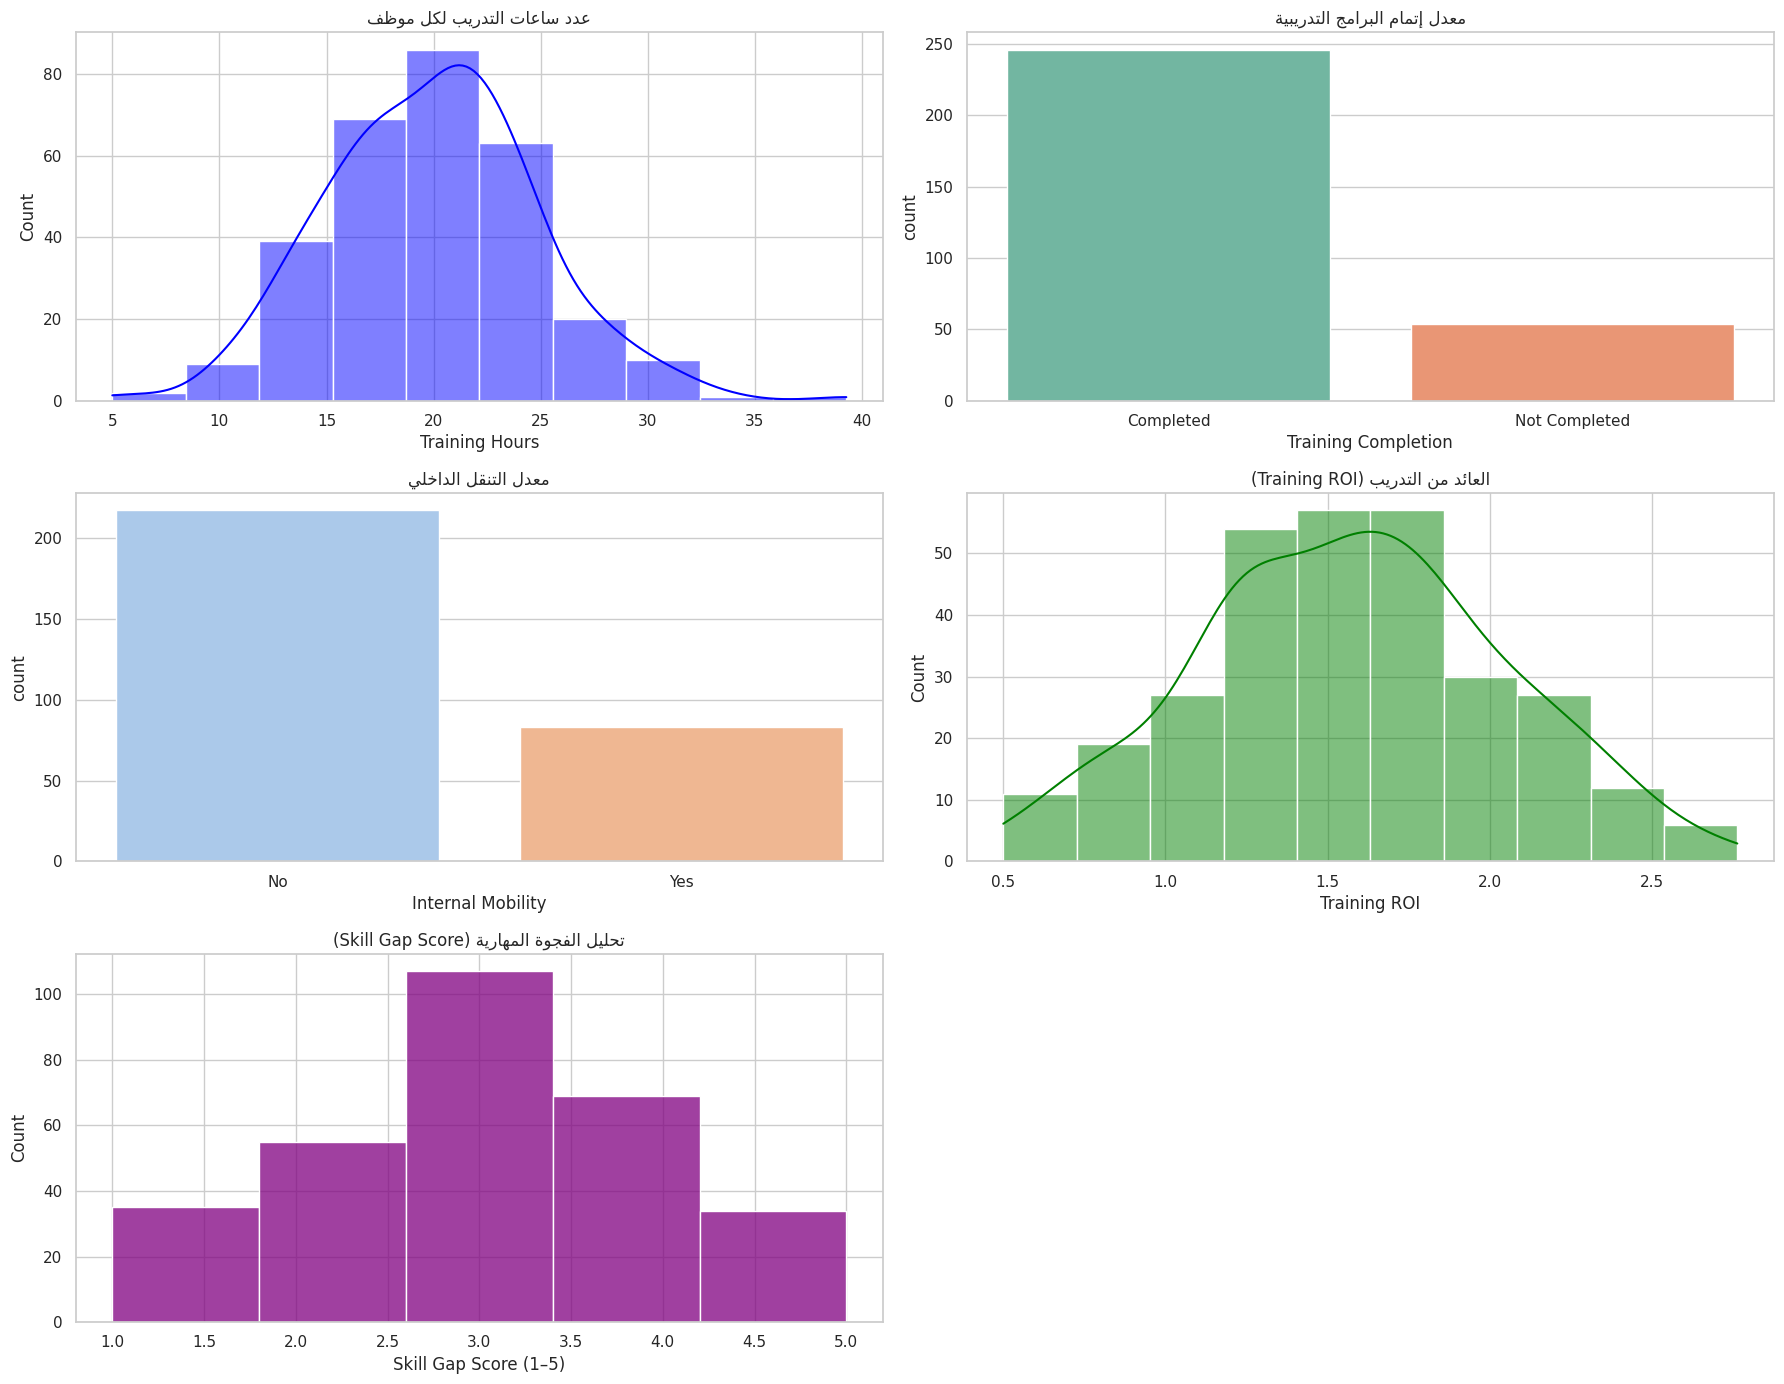

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 14))

# Training Hours
plt.subplot(3, 2, 1)
sns.histplot(df['TrainingHours'], bins=10, kde=True, color='blue')
plt.title(text_arabic_fix('عدد ساعات التدريب لكل موظف'))
plt.xlabel('Training Hours')

# Training Completion
plt.subplot(3, 2, 2)
sns.countplot(x='TrainingCompletion', data=df, palette='Set2')
plt.title(fix_arabic_text('معدل إتمام البرامج التدريبية'))
plt.xlabel('Training Completion')

# Internal Mobility
plt.subplot(3, 2, 3)
sns.countplot(x='InternalMobility', data=df, palette='pastel')
plt.title(fix_arabic_text('معدل التنقل الداخلي'))
plt.xlabel('Internal Mobility')

# Training ROI
plt.subplot(3, 2, 4)
sns.histplot(df['TrainingROI'], bins=10, kde=True, color='green')
plt.title(fix_arabic_text('العائد من التدريب (Training ROI)'))
plt.xlabel('Training ROI')

# Skill Gap Score
plt.subplot(3, 2, 5)
sns.histplot(df['SkillGapScore'], bins=5, kde=False, color='purple')
plt.title(fix_arabic_text('تحليل الفجوة المهارية (Skill Gap Score)'))
plt.xlabel('Skill Gap Score (1–5)')

plt.tight_layout()
plt.show()


## 7) Turnover_metrics.csv — Turnover and retention indicators

In [24]:
df = load_csv("Turnover_metrics.csv")
df.head()


'Turnover_metrics.csv' not found. Please upload it now...


Saving turnover_metrics.csv to turnover_metrics.csv
Using uploaded file: turnover_metrics.csv


,TurnoverStatus,TenureYears,TurnoverType,ExitReason,RetentionStatus
0,No,0.5,Not Applicable,Not Applicable,Retained
1,No,3.8,Not Applicable,Not Applicable,Retained
2,No,3.9,Not Applicable,Not Applicable,Retained
3,No,5.1,Not Applicable,Not Applicable,Retained
4,Yes,6.5,Voluntary,Better offer,Left


/tmp/ipython-input-1770600144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TurnoverStatus', data=df, palette='Set2')
/tmp/ipython-input-1770600144.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1770600144.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RetentionStatus', data=df, palette='muted')
/tmp/ipython-input-1770600144.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` fo

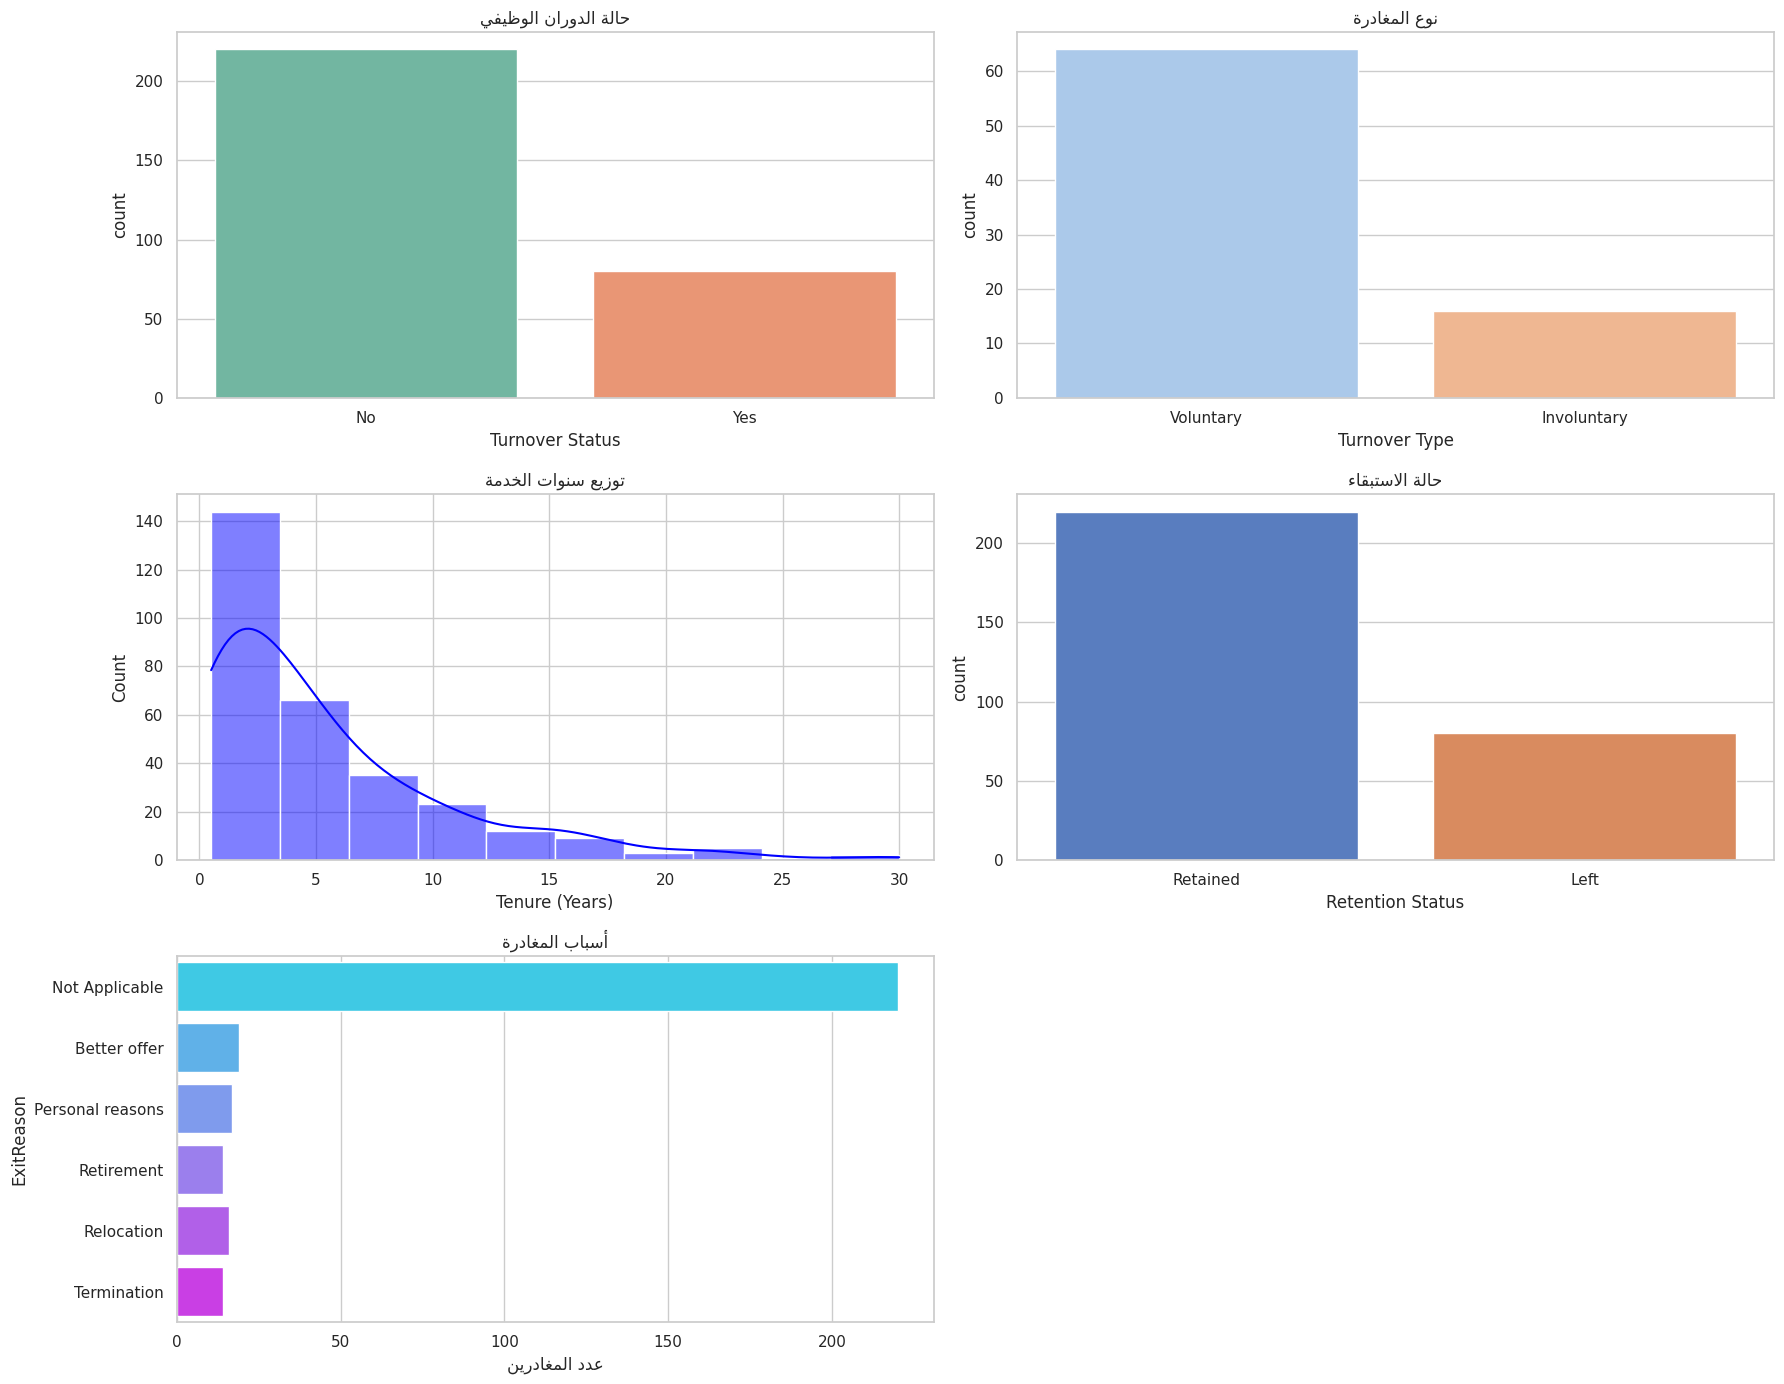

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 14))

# Turnover Status
plt.subplot(3, 2, 1)
sns.countplot(x='TurnoverStatus', data=df, palette='Set2')
plt.title(fix_arabic_text('حالة الدوران الوظيفي'))
plt.xlabel('Turnover Status')

# Turnover Type (only leavers)
plt.subplot(3, 2, 2)
sns.countplot(
    x='TurnoverType',
    data=df[df['TurnoverStatus'] == 'Yes'],
    palette='pastel'
)
plt.title(fix_arabic_text('نوع المغادرة'))
plt.xlabel('Turnover Type')

# Tenure (Years)
plt.subplot(3, 2, 3)
sns.histplot(df['TenureYears'], bins=10, kde=True, color='blue')
plt.title(fix_arabic_text('توزيع سنوات الخدمة'))
plt.xlabel('Tenure (Years)')

# Retention Status
plt.subplot(3, 2, 4)
sns.countplot(x='RetentionStatus', data=df, palette='muted')
plt.title(fix_arabic_text('حالة الاستبقاء'))
plt.xlabel('Retention Status')

# Exit Reason
plt.subplot(3, 2, 5)
sns.countplot(
    y='ExitReason',
    data=df[df['ExitReason'].notna()],
    palette='cool'
)
plt.title(fix_arabic_text('أسباب المغادرة'))
plt.xlabel(fix_arabic_text('عدد المغادرين'))

plt.tight_layout()
plt.show()


## 8) efficiency_metrics.csv — HR operational efficiency indicators

In [26]:
df = load_csv("efficiency_metrics.csv")
df.head()


,HRtoEmployeeRatio,TicketResolutionTime,PayrollAccuracyRate,ProcessAutomationRate,TicketsClosedMonthly
0,0.010993,19.855025,98.756989,65.530100,66
1,0.009723,21.199095,97.077835,54.099918,44
2,0.011295,27.736468,98.869606,60.431172,52
3,0.013046,27.051851,99.355638,79.176778,47
4,0.009532,23.895492,98.413435,62.866486,56


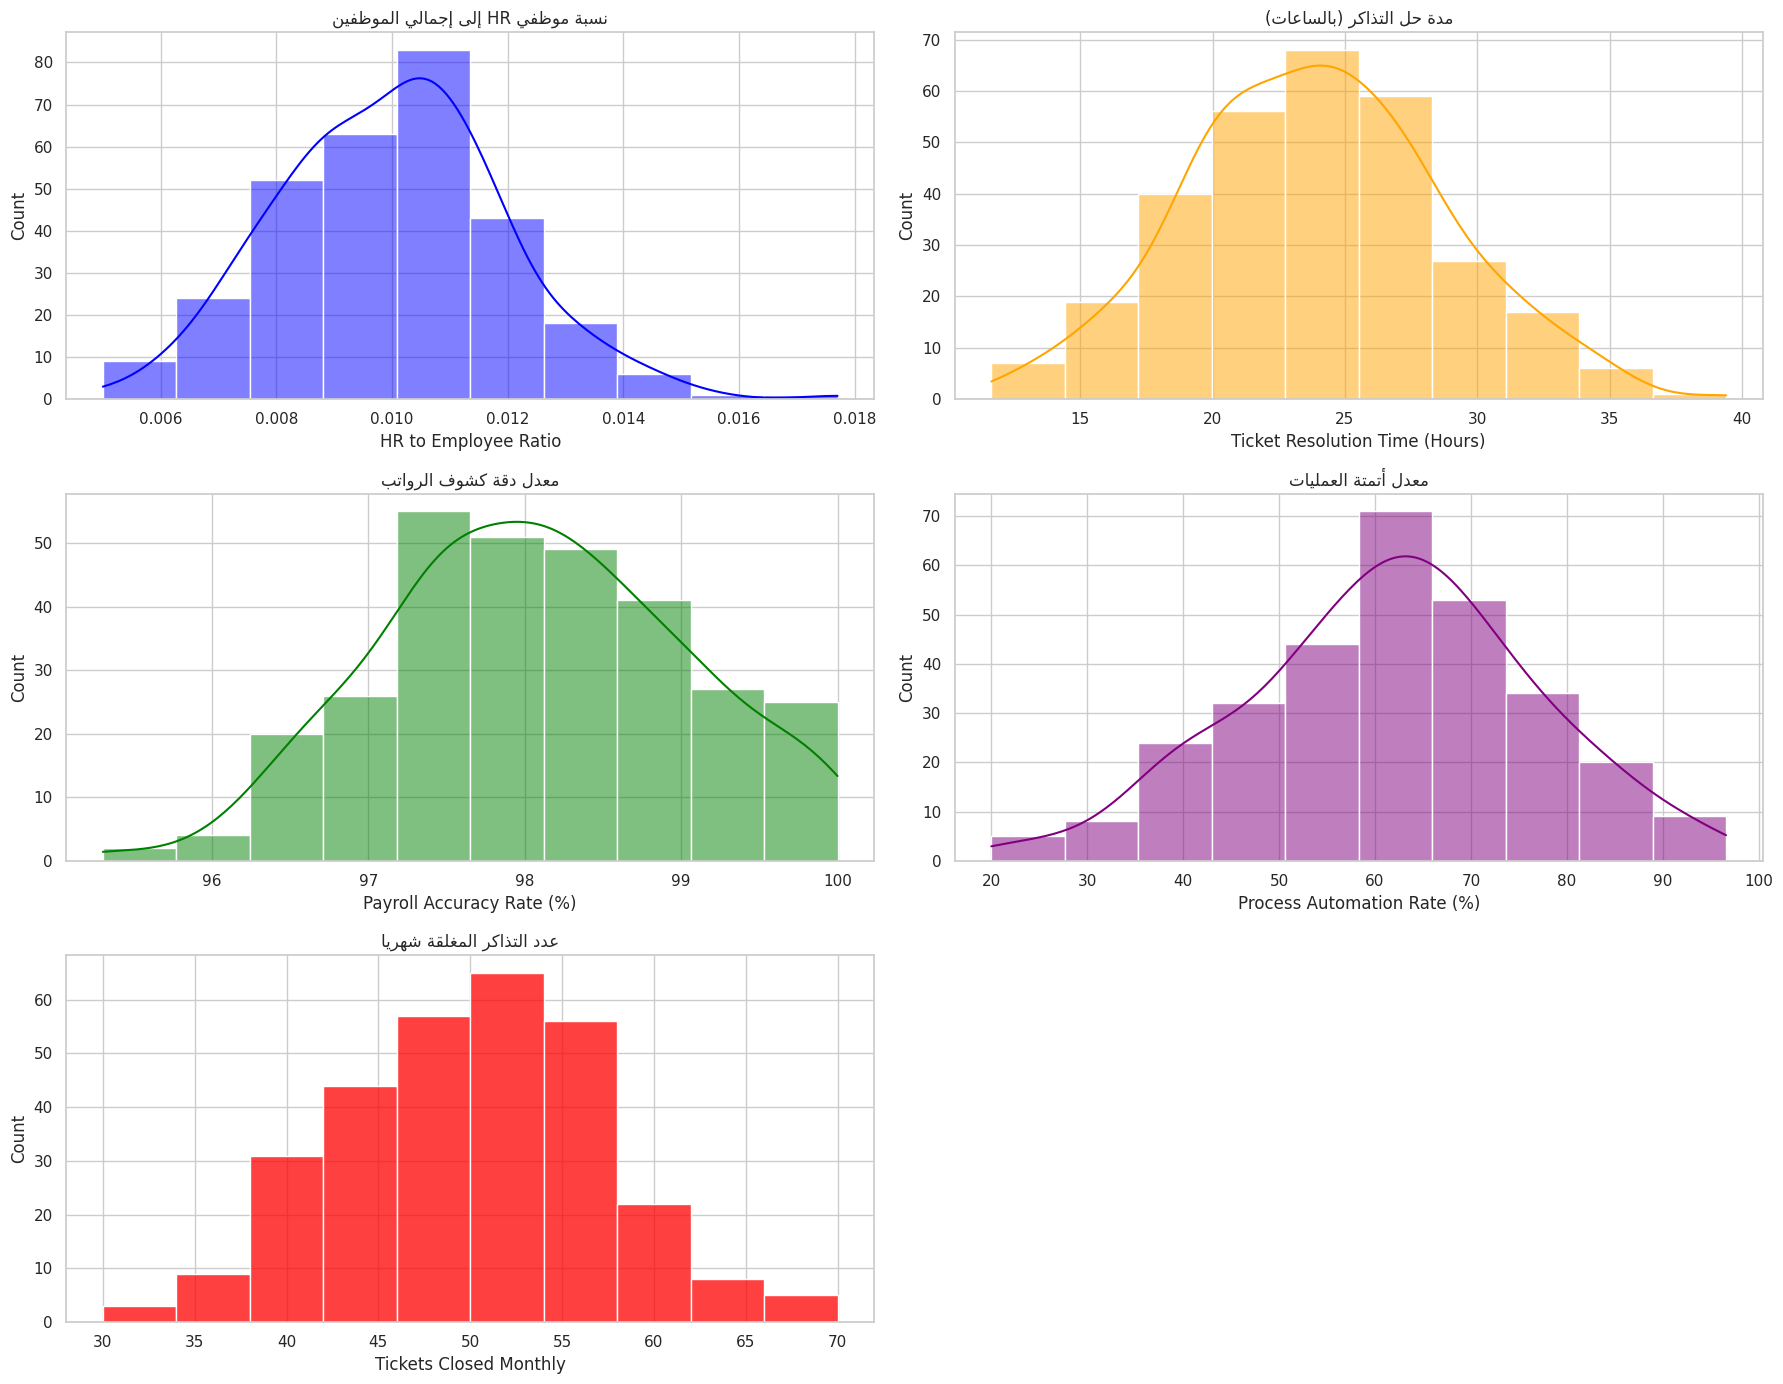

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 14))

# HR to Employee Ratio
plt.subplot(3, 2, 1)
sns.histplot(df['HRtoEmployeeRatio'], bins=10, kde=True, color='blue')
plt.title(fix_arabic_text('نسبة موظفي HR إلى إجمالي الموظفين'))
plt.xlabel('HR to Employee Ratio')

# Ticket Resolution Time
plt.subplot(3, 2, 2)
sns.histplot(df['TicketResolutionTime'], bins=10, kde=True, color='orange')
plt.title(fix_arabic_text('مدة حل التذاكر (بالساعات)'))
plt.xlabel('Ticket Resolution Time (Hours)')

# Payroll Accuracy Rate
plt.subplot(3, 2, 3)
sns.histplot(df['PayrollAccuracyRate'], bins=10, kde=True, color='green')
plt.title(fix_arabic_text('معدل دقة كشوف الرواتب'))
plt.xlabel('Payroll Accuracy Rate (%)')

# Process Automation Rate
plt.subplot(3, 2, 4)
sns.histplot(df['ProcessAutomationRate'], bins=10, kde=True, color='purple')
plt.title(fix_arabic_text('معدل أتمتة العمليات'))
plt.xlabel('Process Automation Rate (%)')

# Tickets Closed Monthly
plt.subplot(3, 2, 5)
sns.histplot(df['TicketsClosedMonthly'], bins=10, kde=False, color='red')
plt.title(text_arabic_fix('عدد التذاكر المغلقة شهريًا'))
plt.xlabel('Tickets Closed Monthly')

plt.tight_layout()
plt.show()
